In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
hr = pd.read_csv('HR.csv')
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)

print("\nSample data:")
hr.head()

Column names:
['gpms_rating', 'last_evaluation', 'number_project', 'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample data:


,gpms_rating,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,3,1,1,180,20,0,0,0,Machine_Learning,medium
1,3,1,1,180,19,0,0,0,Machine_Learning,medium
2,2,1,1,180,19,0,0,0,Machine_Learning,medium
3,3,1,1,180,18,0,0,0,Machine_Learning,medium
4,3,1,1,180,17,0,0,0,Machine_Learning,medium


In [2]:
hr=hr.rename(columns = {'sales':'department'})

In [3]:
hr.dtypes

gpms_rating               int64
last_evaluation           int64
number_project            int64
average_monthly_hours     int64
time_spend_company        int64
Work_accident             int64
left                      int64
promotion_last_5years     int64
department               object
salary                   object
dtype: object

In [4]:
#Our data is pretty clean and has no missing value

In [5]:
hr.isnull().any()

gpms_rating              False
last_evaluation          False
number_project           False
average_monthly_hours    False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [6]:
#The data contains 829 employees and 9 features

In [7]:
hr.shape

(829, 10)

In [8]:
hr.describe()

,gpms_rating,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,829.000000,829.000000,829.000000,829.0,829.000000,829.0,829.000000,829.000000
mean,2.223160,0.924005,1.080820,180.0,2.939686,0.0,0.080820,0.460796
std,1.063057,0.265150,0.599502,0.0,2.787781,0.0,0.272723,1.007206
min,0.000000,0.000000,1.000000,180.0,0.000000,0.0,0.000000,0.000000
25%,2.000000,1.000000,1.000000,180.0,1.000000,0.0,0.000000,0.000000
50%,3.000000,1.000000,1.000000,180.0,2.000000,0.0,0.000000,0.000000
75%,3.000000,1.000000,1.000000,180.0,5.000000,0.0,0.000000,0.000000
max,4.000000,1.000000,15.000000,180.0,21.000000,0.0,1.000000,4.000000


In [9]:
hr['department'].unique()

array(['Machine_Learning', 'Tribal_Network', 'Bigdata', 'Javascript',
       'HTML', 'Matplot_Lib', 'CSS', 'Python', 'SQL', 'Numpy',
       'Data_Analytics', 'Data_Science'], dtype=object)

In [10]:
#Find out the number of employees who left the company and those who didn't

In [11]:
hr['left'].value_counts()

0    762
1     67
Name: left, dtype: int64

In [12]:
#Get a sense of the numbers across these two classes. Employees that are active and employees that left

In [13]:
#Since we don't have the satisfactin_level, average_montly_hours, Work_accident; our only observation is the promotion_last_5years 

In [14]:
# The employees who were promoted in the last 5 years are less likely to leave than those who did not get a promotion in the last five years.

In [15]:
hr.groupby('left').mean()

,gpms_rating,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,2.282152,0.919948,1.083990,180.0,2.956693,0.0,0.494751
1,1.552239,0.970149,1.044776,180.0,2.746269,0.0,0.074627


In [16]:
hr.groupby('department').mean()

,gpms_rating,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
Bigdata,1.949153,0.830508,1.050847,180.0,1.966102,0.0,0.101695,0.169492
CSS,2.473684,1.000000,1.000000,180.0,3.105263,0.0,0.052632,0.684211
Data_Analytics,2.169492,0.898305,1.237288,180.0,2.864407,0.0,0.101695,0.440678
Data_Science,1.875000,0.833333,1.000000,180.0,2.958333,0.0,0.083333,0.625000
HTML,2.333333,0.944444,1.000000,180.0,2.222222,0.0,0.000000,0.277778
Javascript,2.666667,1.000000,1.000000,180.0,1.500000,0.0,0.166667,0.166667
Machine_Learning,2.419355,0.946237,1.000000,180.0,4.301075,0.0,0.010753,0.591398
Matplot_Lib,2.395062,0.938272,1.098765,180.0,3.790123,0.0,0.024691,0.555556
Numpy,1.406250,0.718750,1.531250,180.0,2.718750,0.0,0.093750,0.531250


In [17]:
hr.groupby('salary').mean()

,gpms_rating,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,2.076923,0.869231,1.169231,180.0,1.969231,0.0,0.015385,0.269231
low,2.103030,0.945455,1.048485,180.0,3.115152,0.0,0.175758,0.557576
medium,2.295880,0.930712,1.069288,180.0,3.121723,0.0,0.067416,0.477528


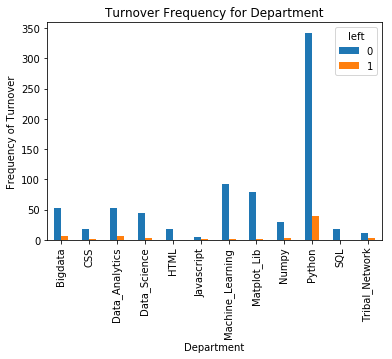

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(hr.department,hr.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

In [19]:
#Salary level is a good indicator the outcome of the employees leaving

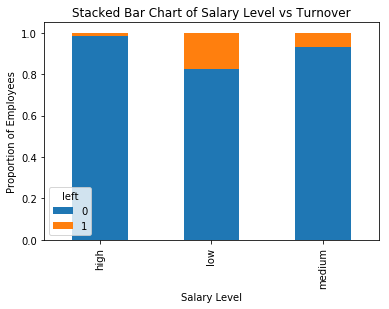

In [20]:
table=pd.crosstab(hr.salary, hr.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

In [21]:
#Create dummy variable for categorical variables for modelings

In [22]:
hr.head()

,gpms_rating,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,3,1,1,180,20,0,0,0,Machine_Learning,medium
1,3,1,1,180,19,0,0,0,Machine_Learning,medium
2,2,1,1,180,19,0,0,0,Machine_Learning,medium
3,3,1,1,180,18,0,0,0,Machine_Learning,medium
4,3,1,1,180,17,0,0,0,Machine_Learning,medium


In [23]:
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

In [24]:
#The actual categorical varialbe needs to be removed once the dummy variables been created.

In [25]:
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)

In [26]:
hr.columns.values

array(['gpms_rating', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_Bigdata',
       'department_CSS', 'department_Data_Analytics',
       'department_Data_Science', 'department_HTML',
       'department_Javascript', 'department_Machine_Learning',
       'department_Matplot_Lib', 'department_Numpy', 'department_Python',
       'department_SQL', 'department_Tribal_Network', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

In [27]:
hr_vars=hr.columns.values.tolist()
y=['left']
X=[i for i in hr_vars if i not in y]


In [28]:
X

['gpms_rating',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'department_Bigdata',
 'department_CSS',
 'department_Data_Analytics',
 'department_Data_Science',
 'department_HTML',
 'department_Javascript',
 'department_Machine_Learning',
 'department_Matplot_Lib',
 'department_Numpy',
 'department_Python',
 'department_SQL',
 'department_Tribal_Network',
 'salary_high',
 'salary_low',
 'salary_medium']

In [29]:
#Recursive feature elimination (RFE) is a feature selection method that fits a model and removes 
#the weakest feature (or features) until the specified number of features is reached. 


In [30]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 10)
rfe = rfe.fit(hr[X], hr[y])
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False False  True  True False False False False
  True  True  True False False  True False  True False  True]
[ 1  1  7 12 11 13  1  1  8  9  3  5  1  1  1  6  2  1 10  1  4  1]


C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C

In [31]:
from pprint import pprint
#factor list 
X
dict_focus = dict(zip(X,rfe.support_))
dict_focus1 = dict(zip(X,rfe.ranking_))
pprint(dict_focus)
pprint(dict_focus1)

get_list_factors = []

for key,value in dict_focus1.items():
    if value == 1:
        get_list_factors.append(key)
        

print(get_list_factors)
          

{'Work_accident': False,
 'average_monthly_hours': False,
 'department_Bigdata': True,
 'department_CSS': False,
 'department_Data_Analytics': False,
 'department_Data_Science': False,
 'department_HTML': False,
 'department_Javascript': True,
 'department_Machine_Learning': True,
 'department_Matplot_Lib': True,
 'department_Numpy': False,
 'department_Python': False,
 'department_SQL': True,
 'department_Tribal_Network': False,
 'gpms_rating': True,
 'last_evaluation': True,
 'number_project': False,
 'promotion_last_5years': True,
 'salary_high': True,
 'salary_low': False,
 'salary_medium': True,
 'time_spend_company': False}
{'Work_accident': 13,
 'average_monthly_hours': 12,
 'department_Bigdata': 1,
 'department_CSS': 8,
 'department_Data_Analytics': 9,
 'department_Data_Science': 3,
 'department_HTML': 5,
 'department_Javascript': 1,
 'department_Machine_Learning': 1,
 'department_Matplot_Lib': 1,
 'department_Numpy': 6,
 'department_Python': 2,
 'department_SQL': 1,
 'departme

In [32]:
X_factors=hr[get_list_factors]
y=hr['left']


In [33]:
#LOGISTIC REGRESSION

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_factors, y, test_size=0.3, random_state=0)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.928


In [37]:
#Random Forests or Random decision forests 

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.944


In [40]:
# #Saving the Random forest model as the pickle
# import pickle
# pkl_filename = "random_forest.pkl"
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(rf, file)

In [41]:
# #This code is making sure that model is uploading 
# with open(pkl_filename, 'rb') as file:
#     pickle_model = pickle.load(file)
    
# score = pickle_model.score(X_test, y_test)
# print(score)
# Ypredict = pickle_model.predict(X_test)

In [42]:
#Support Vector Machine. In other words, given labeled training data (supervised learning), 
#the algorithm outputs an optimal hyperplane which categorizes new examples.

In [43]:
#A supervised machine learning algorithm that can be employed for both classificatin and regression purposes.

In [44]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [45]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.912


In [46]:
#Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. 
#We are using 10-fold Cross-Validation to train our Random Forest model.
#Validation is probably in one of most important techniques that a data scientist use as there is always a need to
#validate the stability of the machine learning model-how well it would generalize to new data. It needs to be sure that 
#the model has got most of the patterns from the data correct, and its not picking up too much on the noise, 
#or in other words its low on bias and variance.

In [47]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

10-fold cross validation average accuracy: 0.921


C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [48]:
#We are using 10=fold Cross-Validation to train our Random Forest model.It is a meta estimator that fits a 
#number of decision treee classifiers on a various sub-samples of the dataset and uses averaging to improve 
#the predictive accuracuy and control over-fitting.

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

10-fold cross validation average accuracy: 0.916


C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [50]:
#Precision and recall
#We construct confusion matrix to visualize predictions made by a classifier and evaluate 
#the accuracy of a classification.

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       227
           1       1.00      0.36      0.53        22

    accuracy                           0.94       249
   macro avg       0.97      0.68      0.75       249
weighted avg       0.95      0.94      0.93       249



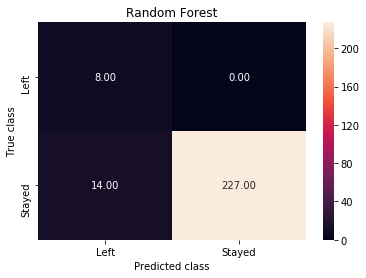

In [52]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [53]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       227
           1       0.00      0.00      0.00        22

    accuracy                           0.91       249
   macro avg       0.46      0.50      0.48       249
weighted avg       0.83      0.91      0.87       249



C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


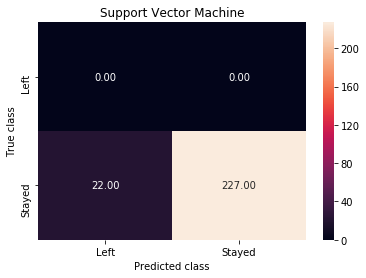

In [54]:
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

In [55]:
#In Machine Learning, performance measurement is an essential task. So when it comes to a classification problem, 
#we can count on an AUC - ROC Curve. When we need to check or visualize the performance of the 
#multi - class classification problem, we use AUC (Area Under The Curve) ROC (Receiver Operating Characteristics) curve. 
#It is one of the most important evaluation metrics for checking any classification model’s performance. 
#It is also written as AUROC (Area Under the Receiver Operating Characteristics)

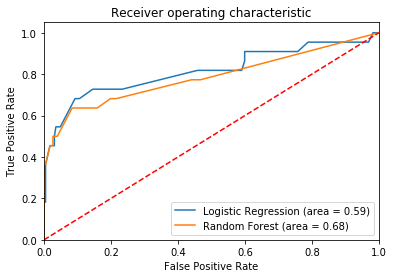

In [56]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

In [57]:
feature_labels = np.array(get_list_factors)
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

department_SQL-1.47%
department_Javascript-2.62%
department_Matplot_Lib-2.95%
department_Bigdata-3.67%
department_Machine_Learning-4.01%
salary_medium-8.07%
promotion_last_5years-12.02%
salary_high-14.79%
last_evaluation-21.02%
gpms_rating-29.38%


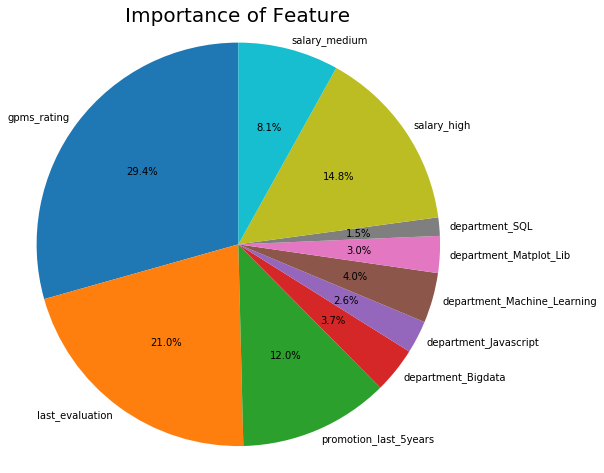

In [58]:
labels = feature_labels
sizes = importance
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, labeldistance=1.05, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Importance of Feature', fontsize=20)
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.savefig('important_feature')

C:\Users\kim.harlan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


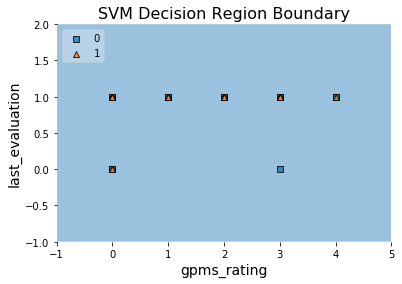

In [59]:
%matplotlib inline
from mlxtend.plotting import plot_decision_regions
from sklearn import svm
import matplotlib.pyplot as plt
# X_factors=hr[get_list_factors]
# y=hr[‘left’]
value = 0.2
width = 100
# 1.5, 0.75

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X_factors.values, y.values)

# Plot Decision Region using mlxtend’s awesome plotting function
plot_decision_regions(X=X_factors.values,
                     y=y.values,
                     clf=clf,
                     feature_index=[0,1],
                     filler_feature_values={2: value, 3: value, 4: value, 5: value, 6: value, 7: value, 8: value, 9: value},
                     filler_feature_ranges={2: width, 3: width, 4: width, 5: width, 6: width, 7: width, 8: width, 9: width},
                     legend=2)

# Update plot object with X/Y axis labels and Figure Title
plt.xlabel(X_factors.columns[0], size=14)
plt.ylabel(X_factors.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)
plt.show()

In [68]:
predictions=rf.predict(X_test)

In [69]:
df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
df

,Prediction,Actual
826,0,0
103,0,1
8,0,0
258,0,0
627,0,0
356,0,0
294,0,0
656,0,0
520,0,0
316,0,0


In [70]:
precision_df = df.loc[df["Prediction"]==1]
precision_df

,Prediction,Actual
701,1,1
101,1,1
456,1,1
795,1,1
809,1,1
494,1,1
531,1,1
747,1,1


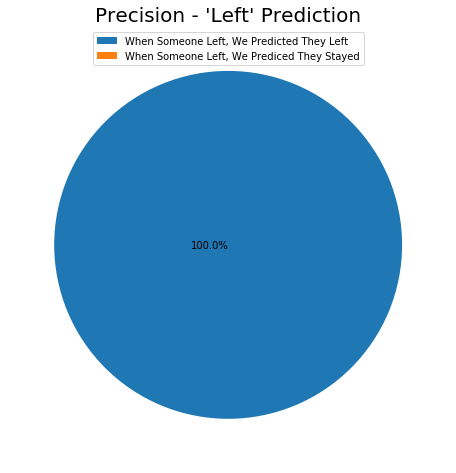

In [71]:
precision = (precision_df["Prediction"].sum() / precision_df["Actual"].sum())

true_pos = 1 - precision

precision_labels = [f"{precision*100}%", ""]

plt.figure(figsize=[8,8])
plt.title("Precision - 'Left' Prediction", fontsize=20)
plt.pie([precision, true_pos], labels=precision_labels, labeldistance=0)
plt.legend(["When Someone Left, We Predicted They Left", "When Someone Left, We Predicted They Stayed"],\
           loc="upper center");

plt.savefig("precision_left_pie.png")

In [72]:
recall_df = (df.loc[df["Actual"]==1])

recall_df

,Prediction,Actual
103,0,1
538,0,1
691,0,1
701,1,1
101,1,1
549,0,1
456,1,1
283,0,1
578,0,1
412,0,1


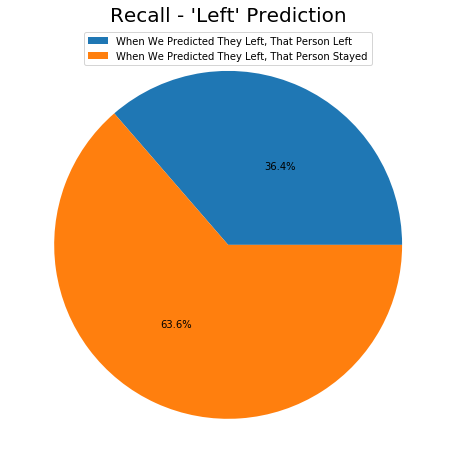

In [73]:
recall = recall_df["Prediction"].sum() / recall_df["Actual"].sum()

false_pos = 1 - recall

recall_labels = [f"{round(recall*100,1)}%", f"{round(false_pos*100,1)}%"]

plt.figure(figsize=[8,8])
plt.title("Recall - 'Left' Prediction", fontsize=20)
plt.pie([recall, false_pos], labels=recall_labels, labeldistance=0.5)
plt.legend(["When We Predicted They Left, That Person Left", "When We Predicted They Left, That Person Stayed"],\
           loc="upper center");

plt.savefig("recall_left_pie.png")

In [74]:
s_recall_df = (df.loc[df["Actual"]==0])

s_recall_df

,Prediction,Actual
826,0,0
8,0,0
258,0,0
627,0,0
356,0,0
294,0,0
656,0,0
520,0,0
316,0,0
432,0,0


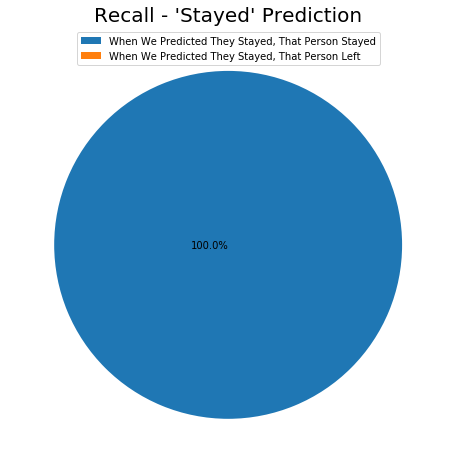

In [75]:
s_recall_rows = (s_recall_df.shape)[0]

s_recall = (s_recall_rows - s_recall_df["Prediction"].sum()) / (s_recall_rows - s_recall_df["Actual"].sum())

s_false_pos = 1 - s_recall

s_recall_labels = [f"{round(s_recall*100,1)}%",""]

plt.figure(figsize=[8,8])
plt.title("Recall - 'Stayed' Prediction", fontsize=20)
plt.pie([s_recall, s_false_pos], labels=s_recall_labels, labeldistance=0)
plt.legend(["When We Predicted They Stayed, That Person Stayed", "When We Predicted They Stayed, That Person Left"],\
           loc="upper center");

plt.savefig("recall_stayed_pie.png")

In [76]:
s_precision_df = (df.loc[df["Prediction"]==0])

s_precision_df

,Prediction,Actual
826,0,0
103,0,1
8,0,0
258,0,0
627,0,0
356,0,0
294,0,0
656,0,0
520,0,0
316,0,0


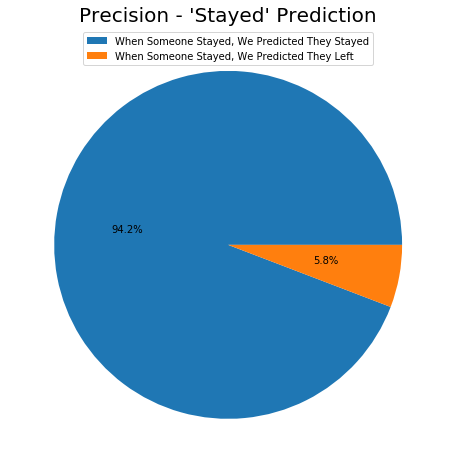

In [77]:
s_precision_rows = (s_precision_df.shape)[0]

s_precision = (s_precision_rows - s_precision_df["Actual"].sum()) / (s_precision_rows - s_precision_df["Prediction"].sum())

s_true_pos = 1 - s_precision

s_precision_labels = [f"{round(s_precision*100,1)}%", f"{round(s_true_pos*100,1)}%"]

plt.figure(figsize=[8,8])
plt.title("Precision - 'Stayed' Prediction", fontsize=20)
plt.pie([s_precision, s_true_pos], labels=s_precision_labels, labeldistance=0.5)
plt.legend(["When Someone Stayed, We Predicted They Stayed", "When Someone Stayed, We Predicted They Left"],\
           loc="upper center");

plt.savefig("precision_stayed_pie.png")